# PS1 Ignasi Merediz-Solà - Quantitative Macroeconomics

In [15]:
#Set the directory of the folder and import the needed packages
import os 
os.chdir("C:/Users/ignas/Desktop/IDEA 2nd/1st trim/Quan Macro/Problem Sets/Problem Set 1")
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
#We import the data for the employment rate
data = pd.read_csv("Data_ESP.txt")
data['TRIM'] = [1,2,3,4,1,2,3,4,1,2]
data['YEAR'] = [2018,2018,2018,2018,2019,2019,2019,2019,2020,2020]

In [30]:
#Create the dummies to do the projection
trim_dummies = pd.get_dummies(data['TRIM'])
dates = data['TIME']

In [33]:
model = LinearRegression()
model.fit(trim_dummies[:-2], data['Value'][:-2])
predictions = model.predict(trim_dummies[-2:])
predictions = data['Value'][:-2]
predictions = pd.concat([predictions, pd.Series(predictions)])
predictions = predictions.reset_index()
predictions = predictions.drop('index', axis = 1)
predictions['Date'] = dates
predictions = predictions[:-6]

predictions = predictions.set_index('Date')

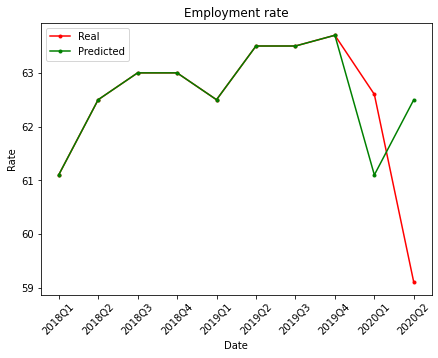

In [39]:
#Plotting employment rate Spain
plt.figure(figsize=(7,5))
plt.plot(dates, data['Value'], '.-r', label='Real')
plt.plot(dates, predictions, '.-g', label='Predicted')
plt.title('Employment rate')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.xticks(rotation = 45)
plt.legend()

#Save the plot
plt.savefig('EmploymentrateSPN.png')

plt.show()

In [40]:
# Employment rate by education level
Data2 = pd.read_csv("Data_ESP2.txt")
Data2['TRIM'] = [1,1,1,2,2,2,3,3,3,4,4,4,1,1,1,2,2,2,3,3,3,4,4,4,1,1,1,2,2,2]
Data2['YEAR'] = [2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2020,2020,2020,2020,2020,2020]

In [110]:
employment_rate_educ = Data2.groupby(['YEAR','TRIM','ISCED11'])['Value'].mean()
employment_rate_educ = employment_rate_educ.reset_index().drop(['YEAR', 'TRIM'], axis = 1)
employment_rate_educ['level_educ'] = [1,3,2,1,3,2,1,3,2,1,3,2,1,3,2,1,3,2,1,3,2,1,3,2,1,3,2,1,3,2]

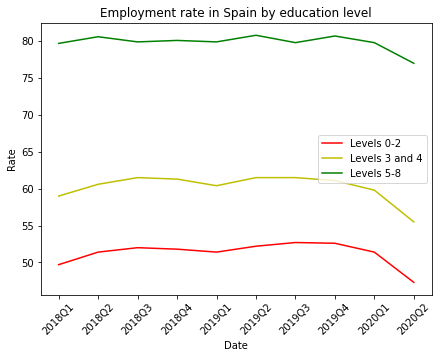

In [103]:
plt.figure(figsize=(7,5))
edu_level_1 = employment_rate_educ[employment_rate_educ['level_educ'] == 1]
plt.plot(dates, edu_level_1['Value'], '-r', label='Levels 0-2')
edu_level_2 = employment_rate_educ[employment_rate_educ['level_educ'] == 2]
plt.plot(dates, edu_level_2['Value'], '-y', label='Levels 3 and 4')
edu_level_3 = employment_rate_educ[employment_rate_educ['level_educ'] == 3]
plt.plot(dates, edu_level_3['Value'], '-g', label='Levels 5-8')


plt.title('Employment rate in Spain by education level')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.xticks(rotation = 45)
plt.legend()

#Save the plot
plt.savefig('SPNEmploymentrateEDU.png')

plt.show()

In [104]:
#Average weekly hours in Spain
Data3 = pd.read_excel('HORAS_ESP.xlsx')

In [107]:
#Predictions
model_hrs = LinearRegression()
model_hrs.fit(trim_dummies[:-2], Data3['AV_HORAS'][:-2])
predictions_hrs = model_hrs.predict(trim_dummies[-2:])
predictions_hrs = pd.concat([Data3['AV_HORAS'][:-2], pd.Series(predictions_hrs)])
predictions_hrs = predictions_hrs.reset_index()
predictions_hrs = predictions_hrs.drop('index', axis = 1)
predictions_hrs['Date'] = dates
predictions_hrs = predictions_hrs.set_index('Date')

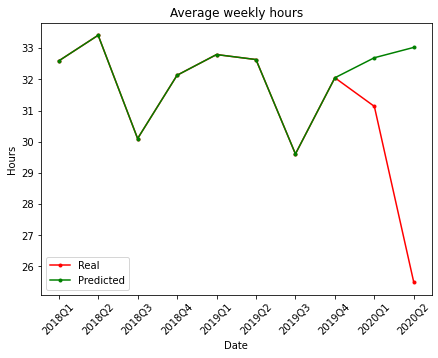

In [108]:
#Plotting
plt.figure(figsize=(7,5))
plt.plot(dates, Data3['AV_HORAS'], '.-r', label='Real')
plt.plot(dates, predictions_hrs, '.-g', label='Predicted')
plt.title('Average weekly hours')
plt.xlabel('Date')
plt.ylabel('Hours')
plt.xticks(rotation = 45)
plt.legend()

#Save the plot
plt.savefig('AvgweeklyhrsSPN.png')

plt.show()


In [94]:
# Mothly labor costs

Data4 = pd.read_excel('WAGE_ESP.xlsx')
Data4

,AÑO,TRIM,AV_WAGE
0,2018,1,2497.91
1,2018,2,2602.01
2,2018,3,2499.87
3,2018,4,2692.52
4,2019,1,2550.27
5,2019,2,2664.55
6,2019,3,2553.62
7,2019,4,2755.15
8,2020,1,2570.32
9,2020,2,2442.91


In [96]:
#Predictions
model_costs = LinearRegression()
model_costs.fit(trim_dummies[:-2], Data4['AV_WAGE'][:-2])
predictions_costs = model_costs.predict(trim_dummies[-2:])
predictions_costs = pd.concat([Data4['AV_WAGE'][:-2], pd.Series(predictions_costs)])
predictions_costs = predictions_costs.reset_index()
predictions_costs = predictions_costs.drop('index', axis = 1)
predictions_costs['Date'] = dates
predictions_costs = predictions_costs.set_index('Date')
predictions_costs

,0
Date,
2018Q1,2497.91
2018Q2,2602.01
2018Q3,2499.87
2018Q4,2692.52
2019Q1,2550.27
2019Q2,2664.55
2019Q3,2553.62
2019Q4,2755.15
2020Q1,2524.09


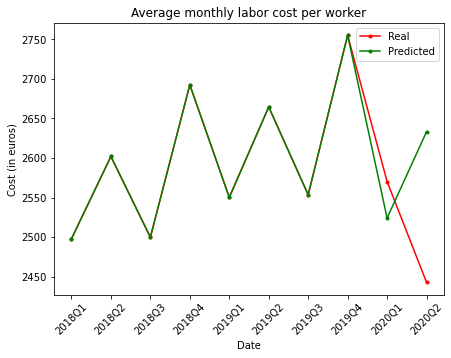

In [112]:
#Plotting monthly costs
plt.figure(figsize=(7,5))
plt.plot(dates, Data4['AV_WAGE'], '.-r', label='Real')
plt.plot(dates, predictions_costs, '.-g', label='Predicted')
plt.title('Average monthly labor cost per worker')
plt.xlabel('Date')
plt.ylabel('Cost (in euros)')
plt.xticks(rotation = 45)
plt.legend()

#Save the plot
plt.savefig('MonthlycostsSPN.png')

plt.show()